In [8]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [10]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)

batch_1 = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
batch_2 = df[[col for col in df.columns if col[0].islower()]].rename(str.lower, axis='columns')
batch_2.insert(0, "counts", np.array(batch_1['counts']) - 2)
batch_2[batch_2['counts'] < 0] = 0
data = batch_1.append(batch_2).reset_index().drop('index', axis=1)
data.sample()

In [ ]:
# Create Training and Validation Data
# witht cce: count = [[1 if val == i else 0 for i in range(0, 184, 2)] for val in data['counts'].values.tolist()]
count = data['counts'].values.tolist()
param = data.drop('counts', axis=1).values.tolist()
n = int(0.95*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

In [3]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=64, activation='relu'),    
    keras.layers.Dense(units=96, activation='relu'),
    keras.layers.Dense(units=92, activation='softmax')
])

2022-07-26 01:53:44.198956: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-26 01:53:44.203218: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [4]:
cce = keras.losses.CategoricalCrossentropy()
sce = keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer='RMSprop', 
              loss=sce,
              metrics=[sce, 'accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                608       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 92)                8924      
Total params: 17,884
Trainable params: 17,884
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=25,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

NameError: name 'param_train' is not defined

NameError: name 'history' is not defined

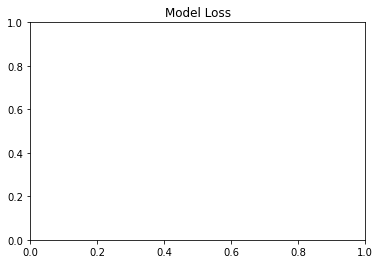

In [6]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

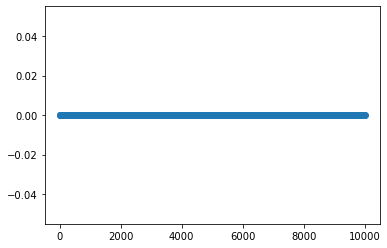

In [ ]:
# Inspect Predictions / reverse one-hot-encoding
def rev(array):
    #TODO noch vektorisieren
    for i, val in enumerate(array):
        if val == 1:
            return 2*i

fig = plt.figure()
prediction = model.predict(param_val)
prediction = [rev(pred) for pred in prediction]
plt.plot(prediction, 'o')
plt.show()